# Inference for categorical data
In August of 2012, news outlets ranging from the [Washington Post](http://www.washingtonpost.com/national/on-faith/poll-shows-atheism-on-the-rise-in-the-us/2012/08/13/90020fd6-e57d-11e1-9739-eef99c5fb285_story.html) to the [Huffington Post](http://www.huffingtonpost.com/2012/08/14/atheism-rise-religiosity-decline-in-america_n_1777031.html) ran a story about the rise of atheism in America. The source for the story was a poll that asked people, “Irrespective of whether you attend a place of worship or not, would you say you are a religious person, not a religious person or a convinced atheist?” This type of question, which asks people to classify themselves in one way or another, is common in polling and generates categorical data. In this lab we take a look at the atheism survey and explore what’s at play when making inference about population proportions using categorical data.

The survey
To access the press release for the poll, conducted by WIN-Gallup International, click on the following link:

http://www.wingia.com/web/files/richeditor/filemanager/Global_INDEX_of_Religiosity_and_Atheism_PR__6.pdf

Take a moment to review the report then address the following questions.

**Exercise 1** In the first paragraph, several key findings are reported. Do these percentages appear to be sample statistics (derived from the data sample) or population parameters?

**Exercise 2** The title of the report is “Global Index of Religiosity and Atheism”. To generalize the report’s findings to the global human population, what must we assume about the sampling method? Does that seem like a reasonable assumption?

# The data
Turn your attention to Table 6 (pages 15 and 16), which reports the sample size and response percentages for all 57 countries. While this is a useful format to summarize the data, we will base our analysis on the original data set of individual responses to the survey. Load this data set into Python with the following commands

In [3]:
import pandas as pd
atheism = pd.read_csv("atheism.csv")

**Exercise 3** What does each row of Table 6 correspond to? What does each row of atheism correspond to?

To investigate the link between these two ways of organizing this data, take a look at the estimated proportion of atheists in the United States. Towards the bottom of Table 6, we see that this is 5%. We should be able to come to the same number using the `atheism` data.

**Exercise 4** Using the command below, create a new dataframe called `us12` that contains only the rows in atheism associated with respondents to the 2012 survey from the United States. Next, calculate the proportion of atheist responses. Does it agree with the percentage in Table 6? If not, why?

In [4]:
us12 = atheism[(atheism['nationality'] == 'United States') & (atheism['year'] == 2012)]

# Inference on proportions
As was hinted at in Exercise 1, Table 6 provides statistics, that is, calculations made from the sample of 51,927 people. What we’d like, though, is insight into the population parameters. You answer the question, “What proportion of people in your sample reported being atheists?” with a statistic; while the question “What proportion of people on earth would report being atheists” is answered with an estimate of the parameter.

The inferential tools for estimating population proportion are analogous to those used for means in the last chapter: the confidence interval and the hypothesis test.

**Exercise 5** Write out the conditions for inference to construct a 95% confidence interval for the proportion of atheists in the United States in 2012. Are you confident all conditions are met?

If the conditions for inference are reasonable, we can either calculate the standard error and construct the interval by hand, or allow the following function to do it for us.

In [6]:
def zconfint_cat(a, success, alpha = 0.05):
    import math
    from scipy import stats

    n = len(a)
    obs = len(a[a == success]) / len(a)
    std = math.sqrt((obs*(1-obs)) / n)

    pvalue = 1.0 - alpha / 2
    crit_val = stats.norm.ppf(pvalue, loc = 0, scale = 1)
    MoE = crit_val * std

    print('standard error = ', std, '\n'
        'critical value on the normal distribution is z =', crit_val, '\n'
          'margin of error =', MoE )

    print ('\nThe observed proportion is {} and the {}% confidence interval is [{} to {}]'.format(obs, (1.0 - alpha)*100, obs - MoE, obs + MoE))

In [7]:
zconfint_cat(us12['response'], 'atheist', alpha=0.05)

standard error =  0.006878629122390021 
critical value on the normal distribution is z = 1.95996398454 
margin of error = 0.0134818653429

The observed proportion is 0.0499001996007984 and the 95.0% confidence interval is [0.0364183342579056 to 0.0633820649436912]


Note that since the goal is to construct an interval estimate for a proportion, it’s necessary to specify what constitutes a “success”, which here is a response of "atheist".

Although formal confidence intervals and hypothesis tests don’t show up in the report, suggestions of inference appear at the bottom of page 7: “In general, the error margin for surveys of this kind is ± 3-5% at 95% confidence”.

**Exercise 6** Based on the Python output, what is the margin of error for the estimate of the proportion of the proportion of atheists in US in 2012?

**Exercise 7** Using the `zconfint_cat` function, calculate confidence intervals for the proportion of atheists in 2012 in two other countries of your choice, and report the associated margins of error. Be sure to note whether the conditions for inference are met. It may be helpful to create new data sets for each of the two countries first, and then use these data sets in the `zconfint_cat` function to construct the confidence intervals.

Imagine you’ve set out to survey 1000 people on two questions: are you female? and are you left-handed? Since both of these sample proportions were calculated from the same sample size, they should have the same margin of error, right? Wrong! While the margin of error does change with sample size, it is also affected by the proportion.

Think back to the formula for the standard error: $SE = \sqrt{p(1-p)/n}$. This is then used in the formula for the margin of error for a 95% confidence interval: $ME = 1.96\times SE = 1.96\times\sqrt{p(1-p)/n}$. Since the population proportion $p$ is in this $ME$ formula , it should make sense that the margin of error is in some way dependent on the population proportion. We can visualize this relationship by creating a plot of $ME$ vs $p$.

The first step is to make an array `p` that is a sequence from 0 to 1 with each number separated by 0.01. We can then create an array of the margin of error (`me`) associated with each of these values of `p` using the familiar approximate formula $ME=2 \times SE$. Lastly, we plot the two vectors against each other to reveal their relationship.

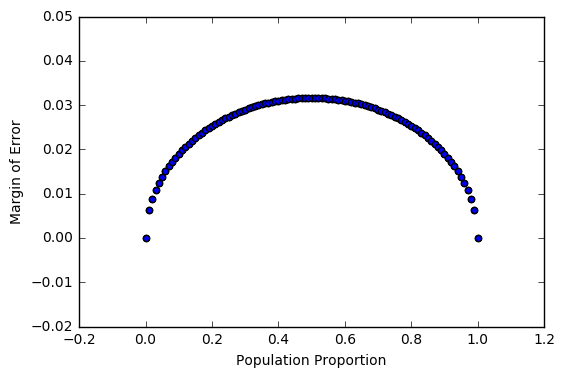

In [22]:
import numpy as np
import math
import matplotlib.pyplot as plt
n = 1000
p = np.linspace(0, 1, 101)
me = [2 * math.sqrt(x * (1 - x) / n) for x in p]
plt.scatter(x = p, y = me)
plt.xlabel('Population Proportion')
plt.ylabel('Margin of Error')
plt.show()

**Exercise 8** Describe the relationship between `p` and `me`.

# Success-failure condition

The textbook emphasizes that you must always check conditions before making inference. For inference on proportions, the sample proportion can be assumed to be nearly normal if it is based upon a random sample of independent observations and if both $np \geq 10$ and $n(1 - p) \geq 10$. This rule of thumb is easy enough to follow, but it makes one wonder: what’s so special about the number 10?

The short answer is: nothing. You could argue that we would be fine with 9 or that we really should be using 11. What is the “best” value for such a rule of thumb is, at least to some degree, arbitrary. However, when $np$ and $n(1−p)$ reaches 10 the sampling distribution is sufficiently normal to use confidence intervals and hypothesis tests that are based on that approximation.

We can investigate the interplay between $n$ and $p$ and the shape of the sampling distribution by using simulations. To start off, we simulate the process of drawing 5000 samples of size 1040 from a population with a true atheist proportion of 0.1. For each of the 5000 samples we compute $\hat{p}$ and then plot a histogram to visualize their distribution.

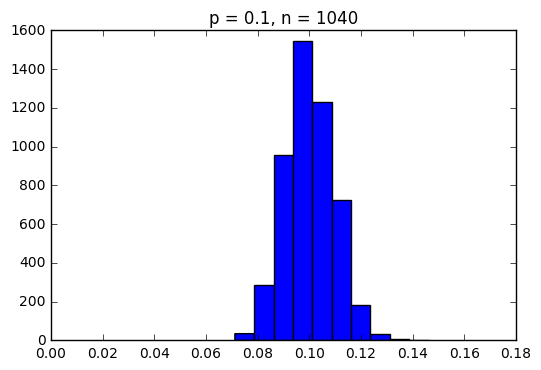

In [30]:
p = 0.1
n = 1040
p_hats = [0] * 5000
for i in range(0,5000):
    samp = pd.Series(["atheist", "non_atheist"]).sample(n, replace=True, weights=(p, 1-p))
    p_hats[i] = np.sum(samp == 'atheist') / n

plt.hist(p_hats)
plt.xlim((0, 0.18))
plt.title("p = 0.1, n = 1040")
plt.show()

These commands build up the sampling distribution of $\hat{p}$ using the familiar `for` loop. You can read the sampling procedure for the first line of code inside the for loop as, “take a sample of size $n$ with replacement from the choices of atheist and non-atheist with probabilities $p$ and $1−p$, respectively.” The second line in the loop says, “calculate the proportion of atheists in this sample and record this value.” The loop allows us to repeat this process 5,000 times to build a good representation of the sampling distribution.

**Exercise 9** Describe the sampling distribution of sample proportions at $n=1040$ and $p=0.1$. Be sure to note the center, spread, and shape.
*Hint:* Remember that pandas and numpy have functions such as mean to calculate summary statistics.

**Exercise 10** Repeat the above simulation three more times but with modified sample sizes and proportions: for $n=400$ and $p=0.1$, $n=1040$ and $p=0.02$, and $n=400$ and $p=0.02$. Plot all four histograms together by running `fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8))` and plotting the the histograms on `axes[0][0]` - `axes[1][1]`. Describe the three new sampling distributions. Based on these limited plots, how does $n$ appear to affect the distribution of $\hat{p}$? How does $p$ affect the sampling distribution?

**Exercise 11** If you refer to Table 6, you’ll find that Australia has a sample proportion of 0.1 on a sample size of 1040, and that Ecuador has a sample proportion of 0.02 on 400 subjects. Let’s suppose for this exercise that these point estimates are actually the truth. Then given the shape of their respective sampling distributions, do you think it is sensible to proceed with inference and report margin of errors, as the reports does?

# On your own
The question of atheism was asked by WIN-Gallup International in a similar survey that was conducted in 2005. (We assume here that sample sizes have remained the same.) Table 4 on page 13 of the report summarizes survey results from 2005 and 2012 for 39 countries.

Answer the following two questions using the previously defined functions. As always, write out the hypotheses for any tests you conduct and outline the status of the conditions for inference.

**a.** Is there convincing evidence that Spain has seen a change in its atheism index between 2005 and 2012?
*Hint:* Create a new data set for respondents from Spain. Form confidence intervals for the true proportion of athiests in both years, and determine whether they overlap.

**b.** Is there convincing evidence that the United States has seen a change in its atheism index between 2005 and 2012?

If in fact there has been no change in the atheism index in the countries listed in Table 4, in how many of those countries would you expect to detect a change (at a significance level of 0.05) simply by chance?
*Hint:* Look in the textbook index under Type 1 error.

Suppose you’re hired by the local government to estimate the proportion of residents that attend a religious service on a weekly basis. According to the guidelines, the estimate must have a margin of error no greater than 1% with 95% confidence. You have no idea what to expect for p. How many people would you have to sample to ensure that you are within the guidelines?
*Hint:* Refer to your plot of the relationship between p and margin of error. Do not use the data set to answer this question.

*This notebook is based on the OpenIntro R lab [Inference for categorical data](http://htmlpreview.github.io/?https://github.com/andrewpbray/oiLabs-base-R/blob/master/inf_for_categorical_data/inf_for_categorical_data.html).*